# Neural Net Solution

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Useful Functions

In [5]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def min_max_column(df, col_name):
    min_ = np.min(df[[col_name]])
    max_ = np.max(df[[col_name]])
    df[col_name] = (df[[col_name]]-min_) / (max_ - min_)
    return df, [min_, max_]

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i,y[i]] = 1
  return Y

def plot_confusion_matrix(confusion_matrix, title='Confusion matrix', cmap=plt.cm.gray_r):

  # define and print matrix with labels
  sns.heatmap(confusion_matrix,
              annot=True,
              fmt='g',
              xticklabels=['0','1'],
              yticklabels=['0','1'])

  # display matrix
  plt.title(title)
  plt.ylabel('Actual',fontsize=12)
  plt.xlabel('Prediction',fontsize=12)
  plt.show()

  #  plt.matshow(df_confusion, cmap=cmap) # imshow
  #  plt.title(title)
  #  plt.colorbar()
  #  tick_marks = np.arange(len(df_confusion.columns))
  #  plt.xticks(tick_marks, df_confusion.columns, rotation=45)
  #  plt.yticks(tick_marks, df_confusion.index)
 #   #plt.tight_layout()
 #   plt.ylabel(df_confusion.index.name)
  #  plt.xlabel(df_confusion.columns.name)

In [6]:
# import previous dataframe
churn_data = pd.read_csv('/content/drive/MyDrive/Data/Churn_Modelling.csv')
print(churn_data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [7]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
churn_data.drop(["RowNumber", "CustomerId", 'Surname'], axis=1, inplace=True)
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# count of Nan present in each row
churn_data.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [10]:
# Create dummy variables
churn = pd.get_dummies(churn_data['Geography'], dtype=float)

# Print the resulting dataframe
print(churn)

      France  Germany  Spain
0        1.0      0.0    0.0
1        0.0      0.0    1.0
2        1.0      0.0    0.0
3        1.0      0.0    0.0
4        0.0      0.0    1.0
...      ...      ...    ...
9995     1.0      0.0    0.0
9996     1.0      0.0    0.0
9997     1.0      0.0    0.0
9998     0.0      1.0    0.0
9999     1.0      0.0    0.0

[10000 rows x 3 columns]


In [11]:
churn_data['ind_row'] = churn_data.index
churn['ind_row'] = churn_data.index
print(churn.head())
print(churn_data)

   France  Germany  Spain  ind_row
0     1.0      0.0    0.0        0
1     0.0      0.0    1.0        1
2     1.0      0.0    0.0        2
3     1.0      0.0    0.0        3
4     0.0      0.0    1.0        4
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998      

In [12]:
churn_data2 = churn_data.merge(churn, left_on='ind_row', right_on='ind_row')
churn_data2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ind_row,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,4,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,9995,1.0,0.0,0.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,9996,1.0,0.0,0.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,9997,1.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,9998,0.0,1.0,0.0


In [13]:
churn_data2['Gender'] = churn_data2['Gender'].replace({'Male': 1, 'Female': 0})
churn_data2.drop('Geography', axis=1, inplace=True)
churn_data2.drop('ind_row', axis=1, inplace=True)
churn_data2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [14]:
churn_data2 = churn_data2.reindex(columns=['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France',
       'Germany', 'Spain', 'Exited'])

print(churn_data2)

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  France  Germ

In [15]:
scaled_churn_data = churn_data2.copy()
min_max_scales = {}
for col_name in ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:

    scaled_churn_data, min_max_scales[col_name] = min_max_column(scaled_churn_data, col_name)
scaled_churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1.0,0.0,0.0,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0.0,0.0,1.0,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1.0,0.0,0.0,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1.0,0.0,0.0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0.0,0.0,1.0,0


In [16]:
plt.figure(figsize=(10,5))
c = scaled_churn_data.corr()

<Figure size 1000x500 with 0 Axes>

<Axes: >

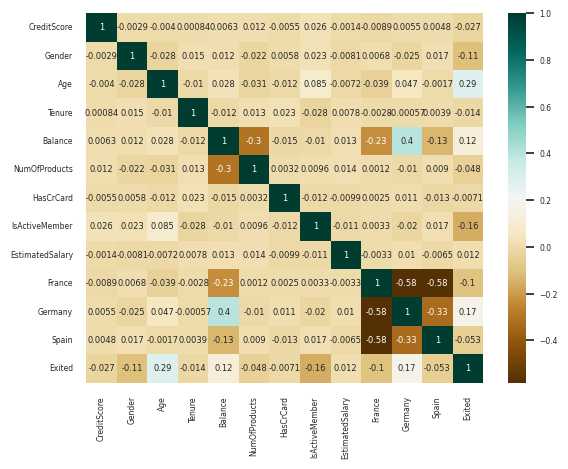

In [ ]:
sns.set(font_scale=0.5)
sns.heatmap(c, cmap="BrBG", annot=True)

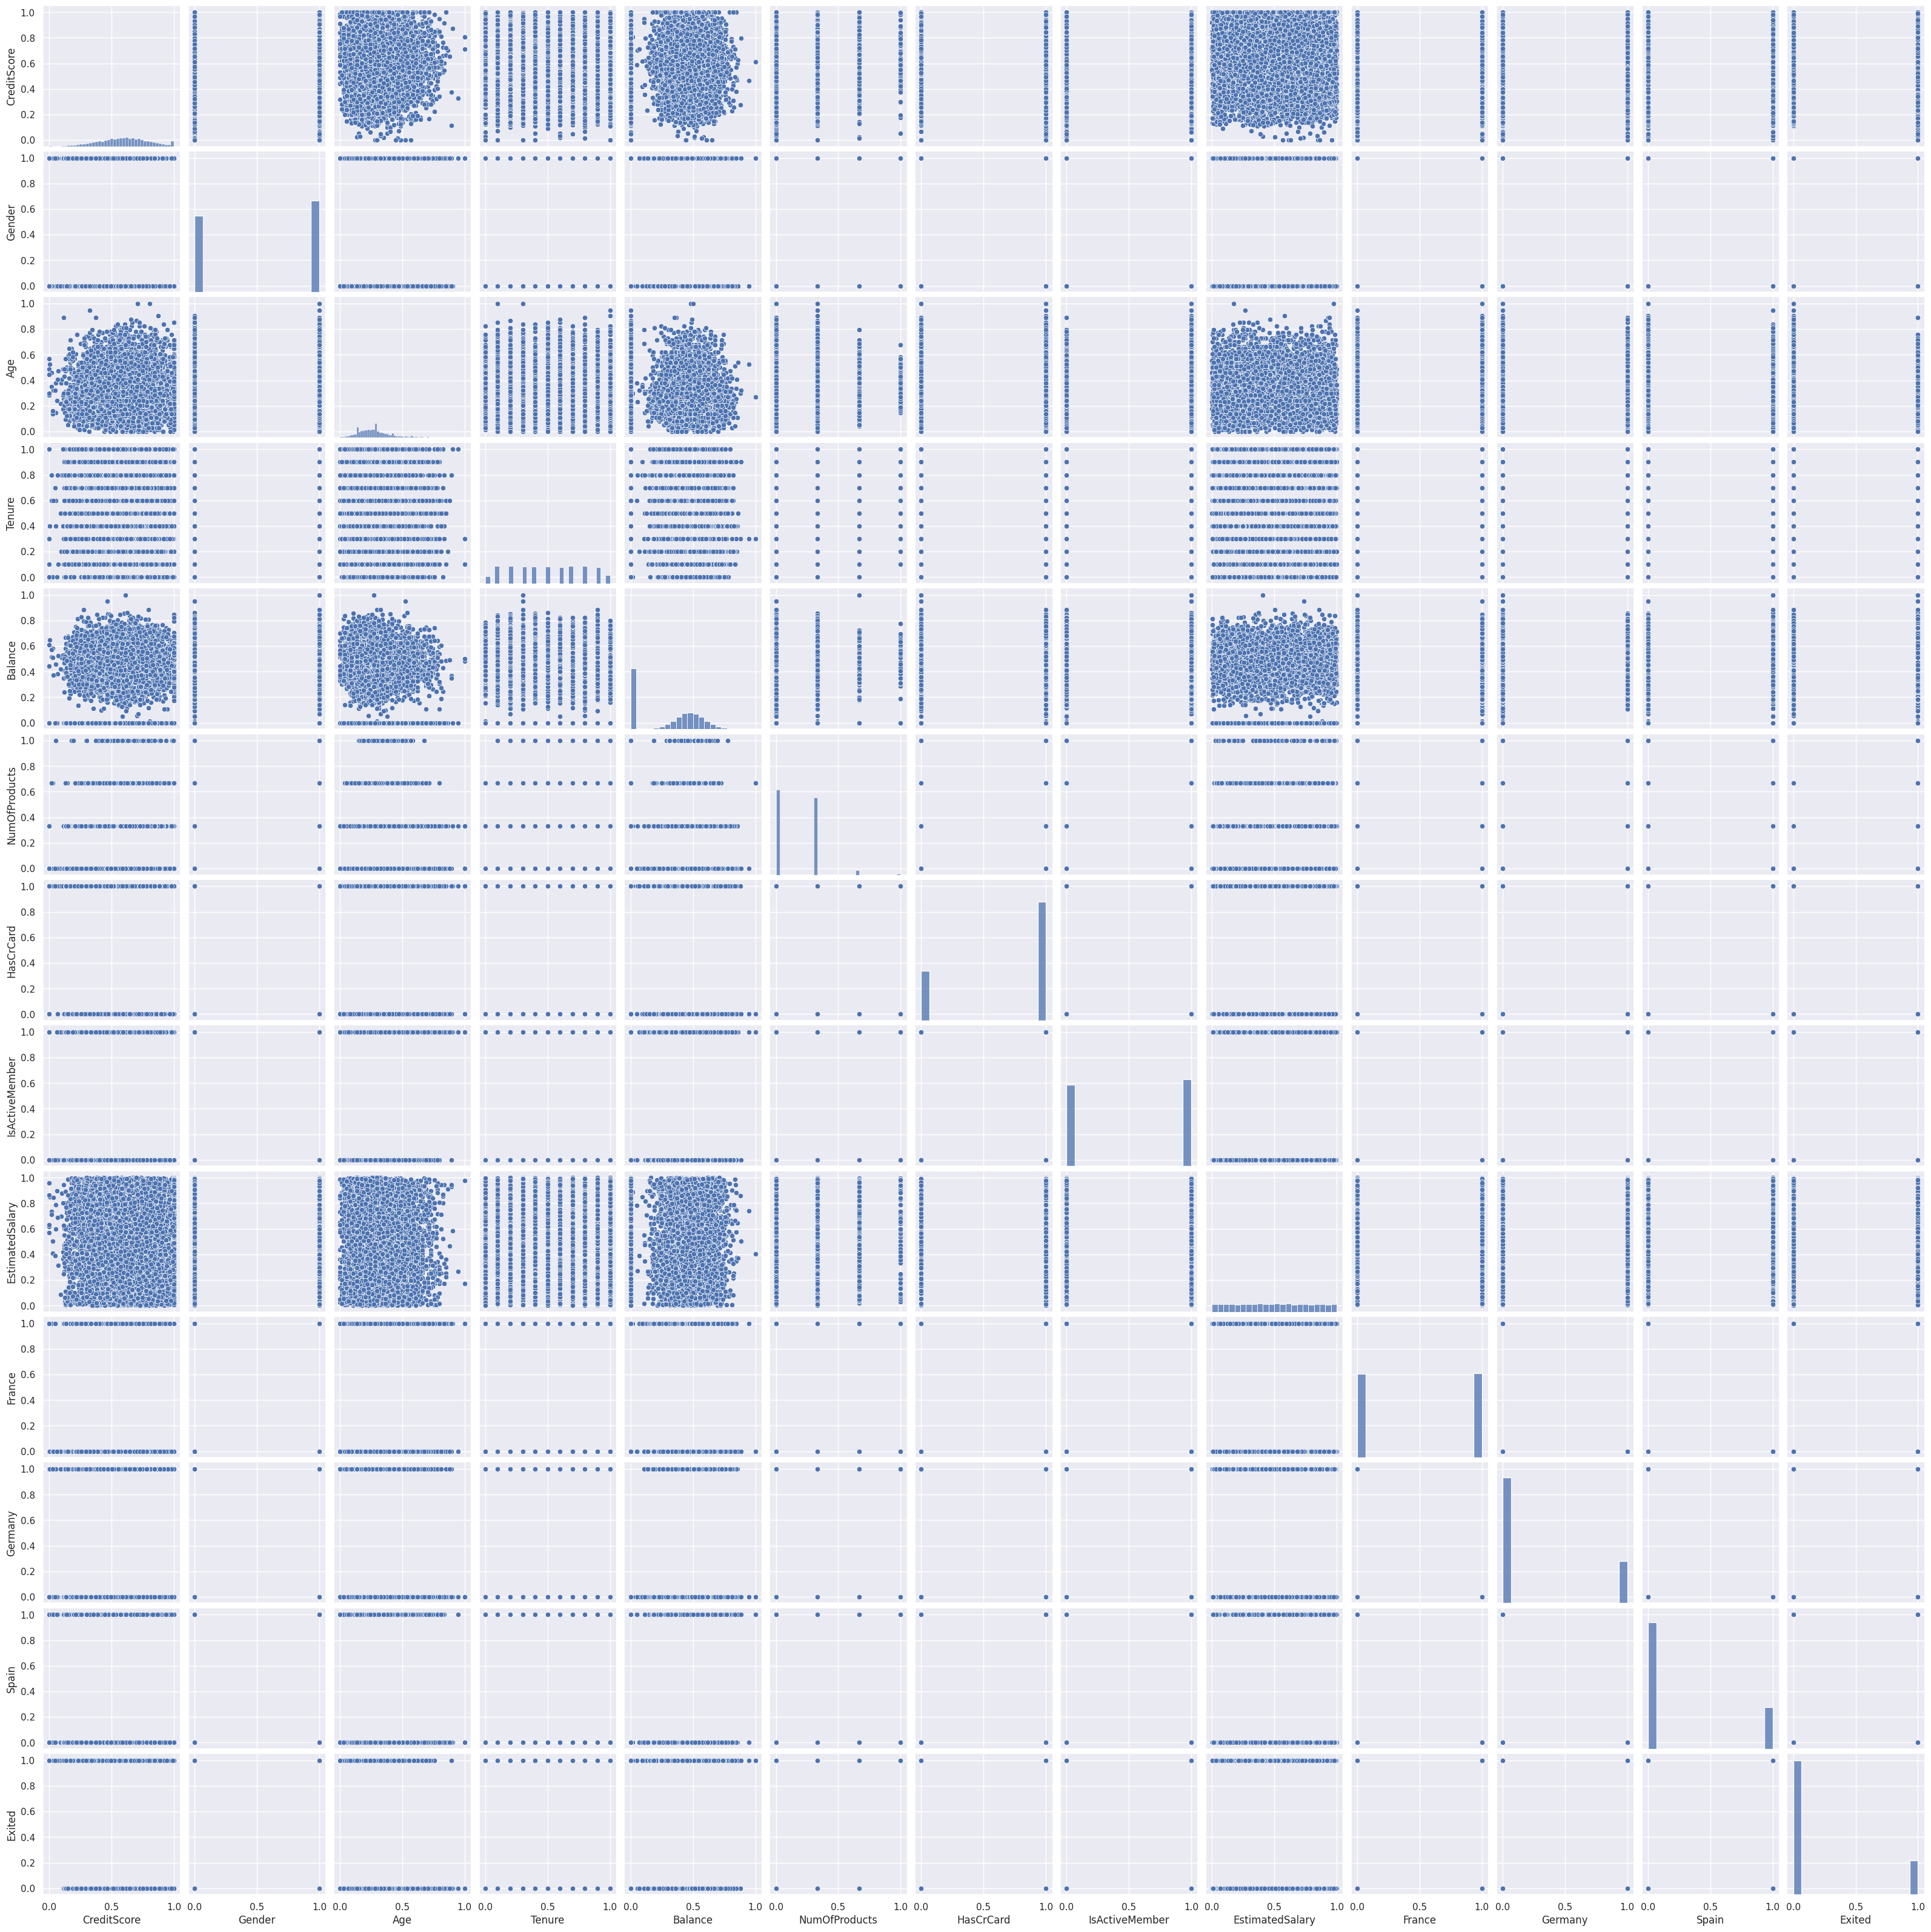

In [ ]:
sns.set(font_scale=1)
sns.pairplot(scaled_churn_data)

In [31]:
scaled_churn_data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [32]:
# Under sampling
churn0 = scaled_churn_data[scaled_churn_data['Exited'] == 0].sample(n = 1000)
churn1 = scaled_churn_data[scaled_churn_data['Exited'] == 1].sample(n = 1000)
churn_train = pd.concat([churn0, churn1])

train_index = churn_train.index
print(train_index)
print(churn_train)

# index used to drop 'test' rows, leaving training sample set
churn_test = scaled_churn_data.drop(index=train_index)
print(churn_test)

Index([5726,  613, 2657, 5526, 4155, 1040,  800,  165, 8526, 6777,
       ...
       9337, 2139, 1365, 5233,  571, 8641, 1070, 2460,  946,  139],
      dtype='int64', length=2000)
      CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
5726        0.676       0  0.378378     0.8  0.620498       0.000000   
613         0.634       1  0.270270     0.1  0.347561       0.000000   
2657        0.424       1  0.148649     0.9  0.000000       0.000000   
5526        0.458       1  0.418919     0.4  0.675084       0.000000   
4155        0.474       1  0.310811     0.8  0.339218       0.000000   
...           ...     ...       ...     ...       ...            ...   
8641        0.508       0  0.391892     0.4  0.473928       0.000000   
1070        0.672       0  0.391892     0.5  0.681296       0.000000   
2460        0.620       1  0.310811     0.1  0.517745       0.000000   
946         0.498       0  0.283784     0.4  0.000000       0.000000   
139         0.458       0  0

In [33]:
# Stratafied sampling
#churn_train = scaled_churn_data.groupby('Exited', group_keys=False).apply(lambda x: x.sample(frac=0.8))

#train_index = churn_train.index
#print(train_index)
#print(churn_train)

# index used to drop 'test' rows, leaving training sample set
#churn_test = scaled_churn_data.drop(index=train_index)
#print(churn_test)

In [34]:
train = churn_train.to_numpy()
X_train = train[:,:-1]
y_train = train[:,-1].astype(int)

test = churn_test.to_numpy()
X_test = test[:,:-1]
y_test = test[:,-1].astype(int)

print(X_train)
print(y_train)

[[0.676      0.         0.37837838 ... 0.         0.         1.        ]
 [0.634      1.         0.27027027 ... 0.         0.         1.        ]
 [0.424      1.         0.14864865 ... 1.         0.         0.        ]
 ...
 [0.62       1.         0.31081081 ... 0.         1.         0.        ]
 [0.498      0.         0.28378378 ... 0.         0.         1.        ]
 [0.458      0.         0.22972973 ... 0.         0.         1.        ]]
[0 0 0 ... 1 1 1]


# Binary Logistic Regression Class

In [35]:
class LogisticRegression():
  def __init__(self, thresh=0.5):
    self.thresh = thresh
    self.W = None
    self.b = None

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape

    # Initialize weights and biases
    self.W = np.random.randn(D)
    self.b = np.random.randn(1)
    # Create Zero valued container for J
    J = np.zeros(epochs)

    # SGD
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y,p_hat)
      # Weight and Biases Update Rules
      self.W -= eta*(1/N)*(X.T@(p_hat-y))
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self, X):
    return sigmoid(X@self.W + self.b)

  def predict(self, X):
    return (self.__forward__(X) >= self.thresh).astype(np.float128)

In [36]:
def main():

    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train, eta=1e-2, epochs=1e4, show_curve=True)
    y_hat1 = log_reg.predict(X_test)
    df_confusion = pd.crosstab(y_test,y_hat1.astype(int))

    print(np.unique(y_hat1.astype(int)))
    print(np.unique(y_test))
    print(f"Training Accuracy: {accuracy(y_test,y_hat1): 0.4f}")
    plot_confusion_matrix(df_confusion)
    print(log_reg.W)
    print(log_reg.b)

[0 1]
[0 1]
Training Accuracy:  0.6470


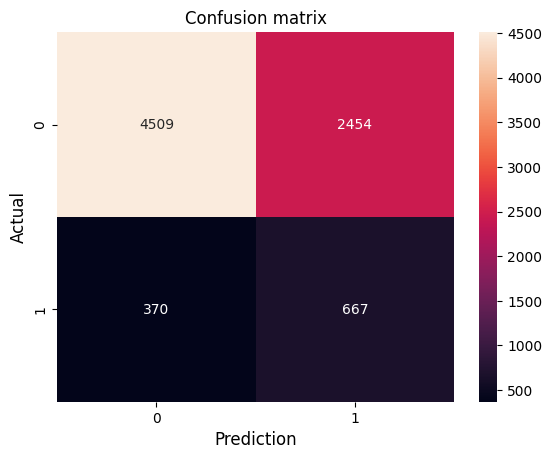

[-0.59626333 -0.47733468  0.64100121  0.11804188  0.34402973 -0.41344141
 -0.04069733 -0.89489635  0.43537037  0.06769723  1.00571908  0.13406379]
[0.16182646]


In [37]:
if __name__=="__main__":
  main()

# Two-Layer Feed Forward Perceptron

## Activation Functions

In [38]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepims=True)

#np.tanh

## Useful Functions

In [39]:
# Activations

def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

# Loss Functions
def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
  return (1/(2*len(Y)))*np.sum()

# Metrics
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

def R2(y, y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

# Misc.
def one_hot(y):
  N=len(y)
  K=len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i,y[i]]=1
  return Y

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))
  for i in range(N):
    Y[i,y[i]] = 1
  return Y

def cross_entropy(Y, P_hat):
  return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

## Derivative and Activation Functions

In [40]:
def derivative(Z,a):

  if a==linear:
    return 1

  elif a==sigmoid:
    return Z*(1-Z)

  elif a==np.tanh:
    return 1-Z*Z

  elif a==ReLU:
    return (Z>0).astype(int)

  else:
    ValueError("Unknown Activation")

## ANN Class

In [45]:
class ANN():

  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture=architecture
    self.activations= activations
    self.L = len(architecture)+1

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs=int(epochs)
    #Classifier, mode=0, Regressor, mode=1
    if self.mode:
      Y=y
      K=1
    else:
      Y =one_hot(y)
      K =Y.shape[1]

    N,D = X.shape

    #Iniatize Weights(and Biases)
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture+[K])),1)}
    self.B = {l: np.random.randn(M) for l,M in enumerate(self.architecture+[K],1)}

    #Activation Setup
    if self.activations is None:
      self.a ={l:ReLU for l in range(1,self.L)}
    else:
      self.a = {l: act for l,act in enumerate(self.activations,1)}

    #Output activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=softmax

    #Define Loss
    J = np.zeros(epochs)

    #Training Cycle
    for epoch in range(epochs):
      self.__forward__(X)

      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])
      #Back Prop
      dH = (1/N)*(self.Z[self.L]-Y)
      for l in sorted(self.W.keys(), reverse=True):

        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)
        #Weight Update Rules per layer
        self.W[l] -=eta*dW
        self.B[l] -=eta*dB

        if l>1:
          dZ =dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1],self.a[l-1])

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

In [ ]:
len(scaled_churn_data.columns)

13

In [ ]:
len(X_test[0])

12

In [46]:
def main_class():

    my_ann_classifier = ANN(architecture=[20,16,14], activations=[sigmoid,np.tanh,sigmoid])
    my_ann_classifier.fit(X_train,y_train, eta=1e-3, epochs=1e4, show_curve=True)
    y_hat=my_ann_classifier.predict(X_test)
    df_confusion = pd.crosstab(y_test,y_hat.astype(int))

    print(my_ann_classifier.W)
    print(my_ann_classifier.B)
    print(f"Training Accuracy:  {accuracy(y_test,y_hat):0.4f}")
    plot_confusion_matrix(df_confusion)

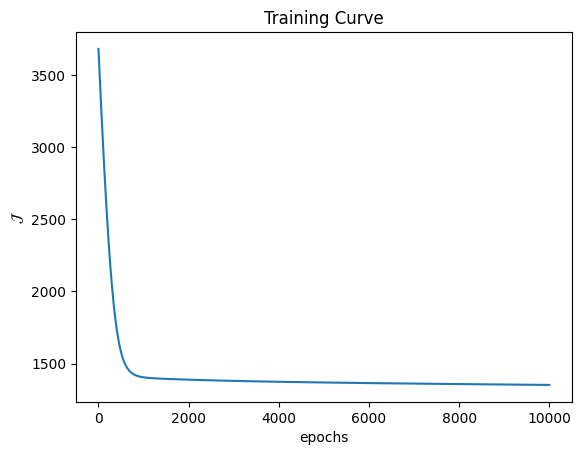

{1: array([[-7.21245208e-01, -9.76000116e-02, -2.34826032e+00,
         3.72569393e-01, -1.07220886e+00,  1.35825452e+00,
        -2.08282905e-02,  9.29129625e-01,  3.10209383e-01,
         2.38821323e-01,  1.63923863e+00,  1.08268413e+00,
         2.28720006e+00,  7.52603001e-01, -7.47356899e-02,
         5.52322441e-01,  8.48695595e-01, -1.27234933e+00,
        -2.42294929e-01, -6.45975609e-01],
       [-7.19395041e-01, -7.84610438e-02, -1.23422378e+00,
         1.82482919e+00,  8.40629469e-01,  1.24275397e-01,
        -1.66371423e+00,  8.58615883e-01, -1.66823909e+00,
         8.15585669e-01,  1.10132213e+00,  9.84418812e-01,
         1.37402956e+00,  1.85338634e+00,  6.50754343e-01,
        -1.06430624e-01,  2.27687503e-01, -1.14494809e+00,
        -1.11443606e+00,  2.48479434e+00],
       [ 1.18095572e+00,  2.76218887e-01,  1.29664701e+00,
        -6.58012385e-02, -1.57114179e-01, -2.74303798e-01,
        -8.56668122e-01, -1.79926696e-01,  2.11976922e+00,
        -4.42602434e-01, 

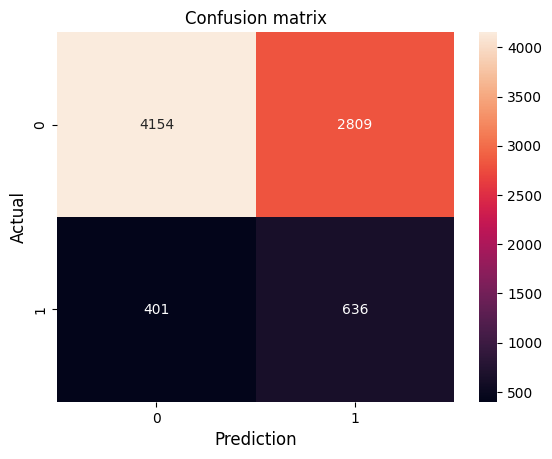

In [47]:
if __name__ == "__main__":
  main_class()

In [ ]:
def main_class():

    my_ann_classifier = ANN(architecture=[20,14], activations=[sigmoid,np.tanh])
    my_ann_classifier.fit(X_train,y_train, eta=1e-4, epochs=3e5, show_curve=True)
    y_hat=my_ann_classifier.predict(X_test)
    df_confusion = pd.crosstab(y_test,y_hat.astype(int))

    print(my_ann_classifier.W)
    print(my_ann_classifier.B)
    print(f"Training Accuracy:  {accuracy(y_test,y_hat):0.4f}")
    plot_confusion_matrix(df_confusion)

In [ ]:
if __name__ == "__main__":
  main_class()

In [48]:
def main_class():

    my_ann_classifier = ANN(architecture=[20,16,14], activations=[sigmoid,sigmoid,sigmoid])
    my_ann_classifier.fit(X_train,y_train, eta=1e-3, epochs=1e4, show_curve=True)
    y_hat=my_ann_classifier.predict(X_test)
    df_confusion = pd.crosstab(y_test,y_hat.astype(int))

    print(my_ann_classifier.W)
    print(my_ann_classifier.B)
    print(f"Training Accuracy:  {accuracy(y_test,y_hat):0.4f}")
    plot_confusion_matrix(df_confusion)

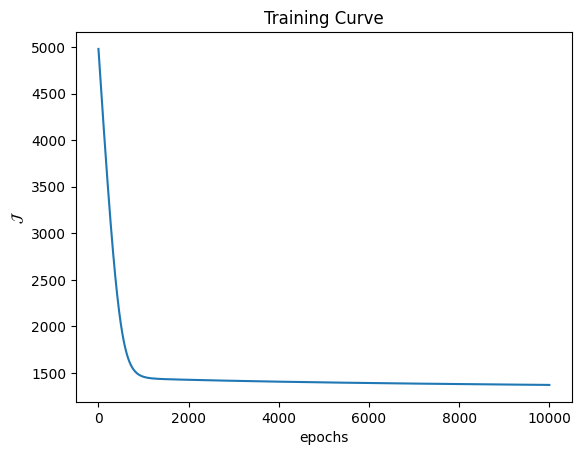

{1: array([[ 0.07526769,  0.41956771, -1.37221693,  0.17434235, -0.06530803,
         0.85776415, -1.29971239, -0.01040171,  1.50520725,  0.98071522,
        -0.69576418, -1.47524736, -1.02916114, -0.12241608, -0.47634096,
         0.30341817,  1.60055358, -1.12590538, -0.30811569,  0.02994798],
       [ 0.10226972, -0.64121526,  0.67059412,  1.93182944,  0.87569168,
         1.12005326,  0.86159471, -0.69956721,  1.17456957,  0.3170226 ,
        -0.6707203 ,  0.15895836,  0.57514169,  0.09278294,  0.48656869,
         1.0728221 , -0.49921794,  0.30408365, -0.36543421, -0.85087563],
       [ 0.01458233,  0.61504345,  0.21131542,  0.25493562, -0.31231222,
         1.08941456,  0.99014246,  1.28879179, -0.57650677, -1.27406309,
        -0.48316718,  0.63987492, -0.19828666,  1.05105452, -1.29703259,
        -0.66737446, -0.92867372, -0.76146388,  1.01058641,  0.57326753],
       [-0.68088428, -0.63614485,  0.95236215,  0.66720177, -1.69327643,
         0.24588182, -2.35178505,  0.0705624

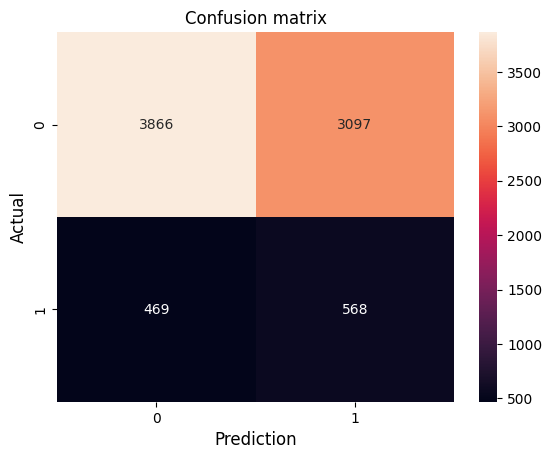

In [49]:
if __name__ == "__main__":
  main_class()

# Shallow ANN Class

In [42]:
class Shallow_ANN():
  def fit(self, X,y, neurons=6, eta=1e-3, epochs=1e3, show_curve=True):
    epochs= int(epochs)
    N, D = X.shape
    Y = one_hot_encode(y)
    K = Y.shape[1]

    # Weights Initialization
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip([D,neurons],[neurons,K]), 1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K], 1)}
    # Define Activations
    self.a = {1:np.tanh, 2:softmax}

    J = np.zeros(epochs)

    # SGD Steps
    for epoch in range(epochs):
        self.__forward__(X)
        J[epoch] = cross_entropy(Y, self.Z[2])
        # Weight update rules for output layer(layer 2)
        self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
        self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
        # Weight Update Rule for Layer 1
        self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
        self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.title("Training Curve")

  def __forward__(self, X):
    self.Z = {0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [43]:
def main():

  my_ann = Shallow_ANN()
  my_ann.fit(X_train, y_train, neurons= 14, eta=1e-2, epochs = 3e4, show_curve= True )
  y_hat3 =my_ann.predict(X_test)
  df_confusion = pd.crosstab(y_test,y_hat3.astype(int))

  print("Accuracy: ", accuracy(y_test, y_hat3))
  print(my_ann.W)
  print(my_ann.B)
  plot_confusion_matrix(df_confusion)

Accuracy:  0.737875
{1: array([[-1.24523009,  0.78947168, -1.82758168,  0.38522375, -0.21549357,
         0.24662093,  1.5153939 ,  0.22368568,  1.05697786,  0.08848726,
        -0.83528095, -0.8407219 , -0.56368644,  0.71839813],
       [-0.28996528, -0.32735507, -2.26595063,  0.44117296,  0.43013669,
         0.46753815,  1.12757014, -1.37134301, -0.89749298, -1.45462047,
         0.31205899,  0.60662783, -1.12397725, -0.22276748],
       [ 1.08411992,  1.3675041 , -0.75239249,  0.37549368, -1.96580589,
        -2.00549871,  0.36262456, -0.31816656,  0.38482973, -1.46582261,
        -2.02045961,  1.58366756,  1.16730125,  1.21455996],
       [-0.9992251 ,  1.08658366, -0.80600801,  0.67361937,  0.03003896,
        -0.08798736, -1.47903625, -1.45905004,  0.70346214,  0.03008683,
        -0.30008084, -0.00436614,  0.77915213,  0.84620266],
       [-0.29950969,  0.08623581,  1.97658018,  0.34729942,  0.42810548,
        -0.72691826,  1.55846442,  0.8806251 , -1.20132826,  0.50333218,
  

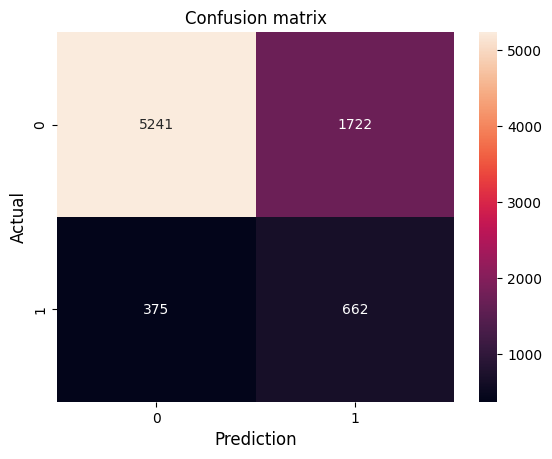

In [44]:
if __name__ == "__main__":
  main()

In [ ]:
def main():

  my_ann = Shallow_ANN()
  my_ann.fit(X_train, y_train, neurons= 12, eta=1e-2, epochs = 3e4, show_curve= True )
  y_hat3 =my_ann.predict(X_test)
  df_confusion = pd.crosstab(y_test,y_hat3.astype(int))

  print("Accuracy: ", accuracy(y_test, y_hat3))
  print(my_ann.W)
  print(my_ann.B)
  plot_confusion_matrix(df_confusion)

Accuracy:  0.817
{1: array([[ 1.01449525,  1.07790133,  1.90749587, -0.08434793,  0.89747805,
         0.5806942 , -1.60854399, -0.49908494, -1.68253818, -0.49258265,
         0.35840236, -0.97010715],
       [ 0.67389073, -1.29902846,  1.53484648, -0.63353092, -1.45724887,
        -0.82502033,  2.77129527,  1.05988262,  0.00455874, -0.90320362,
         0.45802446,  0.86172816],
       [-0.3135059 , -0.58112546, -0.88368167,  0.95309979,  0.47959217,
         2.20115961,  1.53333248,  0.2238501 ,  1.09448133,  0.04231016,
        -1.45008697, -2.08977985],
       [ 0.12490686, -0.45300976,  0.4191938 , -0.46211349, -0.97559038,
         0.09338803,  0.85925288,  2.67237338, -1.65298127, -2.00736956,
         1.90995213,  0.07395108],
       [ 1.12610367,  0.45698767, -0.9815301 ,  1.7575787 , -0.06574609,
        -0.74748974, -1.03125987,  0.7730048 , -0.11062313, -0.0529767 ,
         0.41846989, -1.42112586],
       [ 2.12978801, -0.4334093 ,  0.54996937, -0.80466075,  0.18174272,
 

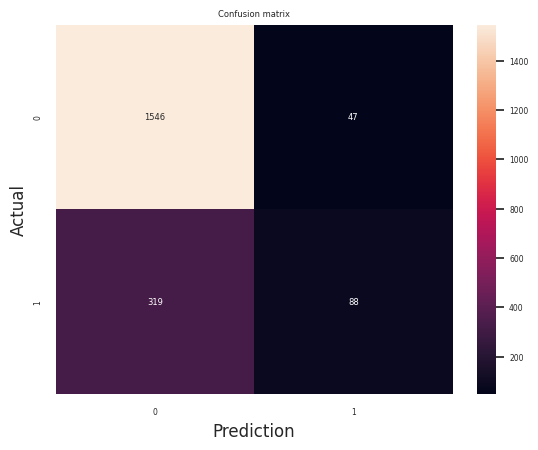

In [ ]:
if __name__ == "__main__":
  main()

# Other Supportive Analysis

## Churn Rate

In [ ]:
churn_data2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain', 'Exited'],
      dtype='object')

In [ ]:
# Calculate Churn Rate for this month

active_accounts = churn_data2[churn_data2['IsActiveMember'] == 1]
exited_accounts = active_accounts[active_accounts['Exited'] == 1]

churn_rate = (0 - (np.sum(exited_accounts['Balance'])*0.1))/(np.sum(active_accounts['Balance'])*0.1)
actual_rate = ((np.sum(active_accounts['Balance'])*0.1) - (np.sum(exited_accounts['Balance'])*0.1))/(np.sum(active_accounts['Balance'])*0.1)
print(f"Churn Rate: {churn_rate}")
print(f"Actual Rate: {actual_rate}")

Churn Rate: -0.17173689182607707
Actual Rate: 0.828263108173923


In [ ]:
t = list(range(21))

bal = 100
y_acutal = [100]
for x in t[1:]:
  bal += bal*0.1*actual_rate
  y_acutal.append(bal)

bal = 100
y_theo = [100]
for x in t[1:]:
  bal += bal*0.1
  y_theo.append(bal)

print(t)
print(y_acutal)
print(y_theo)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[100, 108.28263108173923, 117.25128193984038, 126.9627730615273, 137.4786311653594, 148.86547900101107, 161.1954574347288, 174.54668249456938, 189.00374027100926, 204.65822280834556, 221.6093083820047, 239.96438983807997, 259.8397549759147, 281.3613232842648, 304.66544369860014, 329.89975843369916, 357.2241383643114, 386.811695879949, 418.8498816307043, 453.541672112477, 491.10685561550486]
[100, 110.0, 121.0, 133.1, 146.41, 161.051, 177.15609999999998, 194.87170999999998, 214.35888099999997, 235.79476909999997, 259.37424601, 285.31167061099995, 313.84283767209996, 345.22712143930994, 379.74983358324096, 417.72481694156505, 459.49729863572156, 505.4470284992937, 555.9917313492231, 611.5909044841454, 672.74999493256]


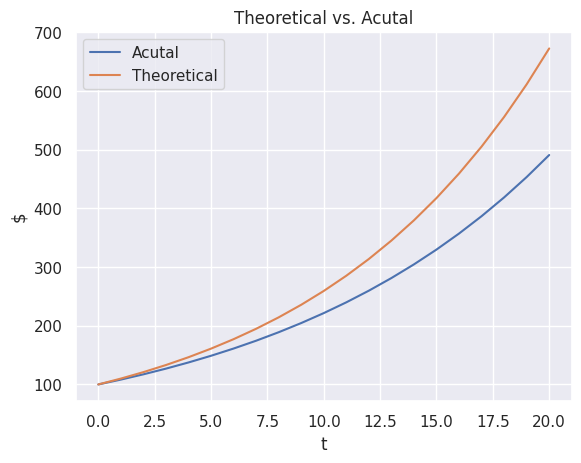

In [ ]:
# Generate some data
x = np.array(t)
y1 = np.array(y_acutal)
y2 = np.array(y_theo)

# Plot the lines
plt.plot(x, y1, label='Acutal')
plt.plot(x, y2, label='Theoretical')

# Add labels and title
plt.xlabel('t')
plt.ylabel('$')
plt.title('Theoretical vs. Acutal')

# Add a legend
plt.legend()

# Show the plot
plt.show()